#                    Credit EDA Assignment - Divya Shah

**Problem Statement** 

Understand how the bank/finance company approves and refuses the loan. Find out the different patterns and represent outcomes to understand driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

The given two input files are imported to read, cleaned/ transformed for better understanding. Potential driver variables are analysed via different charts; generated using Python libraries. Some possible inferences are made based on the observations.

# 1. Importing libraries and files 

In [1]:
#importing some warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#setting the display for columns and rows
pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)

# 2. Metadata check for Application Dataset

In [4]:
#reading csv of Application Data
Application = pd.read_csv("application_data.csv")

In [5]:
Application.shape

(307511, 122)

In [6]:
Application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# 3. Data Analysis for Application Dataset

**3.1 Data Cleaning**

In [7]:
#Finding percentage of missing/null values in all columns
round(Application.isnull().mean()*100,2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [8]:
#Removing columns with more than 50% of null/missing values or keeping the columns with <=50% values
Application = Application.loc[:, Application.isnull().mean()<=0.5]
Application.shape

(307511, 81)

In [9]:
#From above output we can see that there are many columns with 0-13% missing/null values where imputations can be possible.
#Selecting columns in range of 0-13% null/missing values
list(Application.columns[(Application.isnull().mean()>0) & (Application.isnull().mean()<=0.13)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

**3.2 Checking for possible values to impute in columns**

**3.2.1 Imputation for Amount Anuuity Column - The amount that client has to return per month for several years**

In [10]:
Application['AMT_ANNUITY'].isnull().sum()

12

In [11]:
Application['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

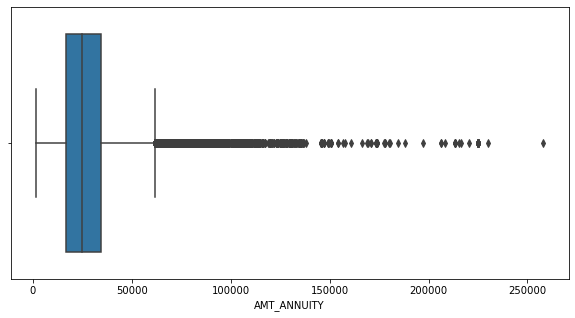

In [12]:
#Plotting boxplot to get better understanding
plt.figure(figsize=(10,5))
sns.boxplot(Application.AMT_ANNUITY)
plt.show()

In [13]:
Application['AMT_ANNUITY'].median()

24903.0

As there are considerable amount of data points post upper fence; hence, we can impute median at the place missing values.

**3.2.2. Imputation for column of AMT_GOODS_PRICE - price of goods for which loan is given.**

In [14]:
Application.AMT_GOODS_PRICE.isnull().sum()

278

In [15]:
Application['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

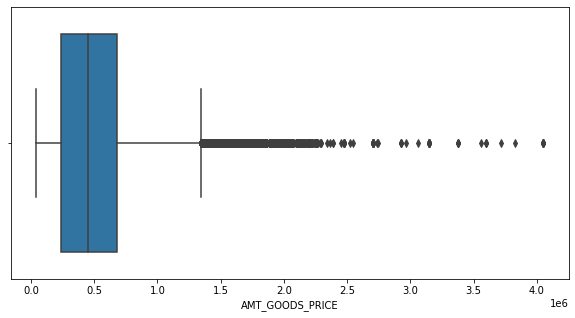

In [16]:
#Plotting boxplot for better understanding
plt.figure(figsize=[10,5])
sns.boxplot(Application['AMT_GOODS_PRICE'])
plt.show()

In [17]:
Application['AMT_GOODS_PRICE'].median()

450000.0

Again from above plot we can see that there are many points ahead of upper fence; so we can impute the null/missing values with median.

**3.2.3 Imputation for Name_Type_Suite column - name of family member accompanied by applicant at the time of loan.**

In [18]:
#Finding null/missing values in name type suite
Application['NAME_TYPE_SUITE'].isnull().sum()

1292

In [19]:
#Checking name type suite column
Application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

For this column we can replace null/missing values with mode i.e. unaccompanied

**3.2.4 Imputation for CNT_FAM_MEMBERS - no. of family members of applicant**

In [20]:
Application['CNT_FAM_MEMBERS'].isnull().sum()

2

In [21]:
Application['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

Here we can replace null/missing values with 2 which is mode for this column.

**3.3 Check data types of columns and modify them appropriately**

In [22]:
#Checking columns with dtype = float
Application.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [23]:
#Converting some count columns to int dtype
cols = ['REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [24]:
Application.loc[:, cols] = Application.loc[:, cols ].apply(lambda col: col.astype('int', errors='ignore'))

In [25]:
#Checking object type columns
cols = list(Application.select_dtypes(include='object').columns)

In [26]:
#Converting obj columns to dtype 'str'
Application.loc[:, cols] = Application.loc[:, cols ].apply(lambda col: col.astype('str', errors='ignore'))

In [27]:
# categorical columns
Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [28]:
Application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,-9461,-637,-3648,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,-19046,-225,-4260,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0,-19005,-3039,-9833,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,-19932,-3038,-4311,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Making code-gender column more readable and finding null/missing values
Application['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [30]:
#Dropping gender = XNA from dataset as much information is not available regarding this.
Application = Application[Application['CODE_GENDER']!= 'XNA']
Application['CODE_GENDER'].replace(['M','F'], ['Male','Female'],inplace=True)

**3.4 Binning variables for better analysis**

In [31]:
#Checking column of Amt income total
Application['AMT_INCOME_TOTAL'].isnull().sum()

0

In [32]:
Application['AMT_INCOME_TOTAL'].describe()

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [33]:
#Checking different quantiles for amt income total
Application['AMT_INCOME_TOTAL'].quantile([0,0.2,0.4,0.6,0.8,1.0])

0.0        25650.0
0.2        99000.0
0.4       135000.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

From above output it is clear that total income of client varies approx from 25000 to 1,00,00,000. 
Based on this, for better understanding we can create bins for this column.

In [34]:
# Creating a new Categorical ordered column for total income
Application['INCOME_RANGE'] = pd.qcut(Application['AMT_INCOME_TOTAL'], q=[0,0.2,0.4,0.6,0.8,1.0], labels = ['Very Low','Low', 'Mediam', 'High','Very High'])

In [35]:
#Checking new column
Application['INCOME_RANGE'].value_counts()

Low          85755
High         75512
Very Low     63671
Very High    47117
Mediam       35452
Name: INCOME_RANGE, dtype: int64

**DAYS_BIRTH is another important column from which age of client can be identified.**

In [36]:
# Creating column Age from column days birth
Application['Age'] = abs(Application['DAYS_BIRTH'])//365

In [37]:
#Checking age column and scope for binning
Application['Age'].describe()

count    307507.000000
mean         43.436055
std          11.954577
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: Age, dtype: float64

In [38]:
# Age group varies from 20 to 69 so we can create bin of 5 years from 20-70
Application['Age_Group'] = pd.cut(Application['Age'], bins=np.arange(20,71,5))

In [39]:
Application['Age_Group'].value_counts()

(35, 40]    43679
(40, 45]    39997
(30, 35]    39437
(25, 30]    36486
(50, 55]    35096
(45, 50]    34404
(55, 60]    32722
(60, 65]    24359
(20, 25]    16317
(65, 70]     5009
Name: Age_Group, dtype: int64

In [40]:
## Amt credit ratio
Application['CREDIT_INCOME_RATIO'] = round((Application['AMT_CREDIT']/Application['AMT_INCOME_TOTAL']))

In [41]:
## Social circle defaulted
Application['SOCIAL_CIRCLE_30_DAYS_DEF_PERC'] = Application['OBS_30_CNT_SOCIAL_CIRCLE']/Application['DEF_30_CNT_SOCIAL_CIRCLE']
Application['SOCIAL_CIRCLE_60_DAYS_DEF_PERC'] = Application['OBS_60_CNT_SOCIAL_CIRCLE']/Application ['DEF_60_CNT_SOCIAL_CIRCLE']

**3.5 Checking imbalance in Target Variable**

In [42]:
Application['TARGET'].value_counts(normalize=True)

0    0.91927
1    0.08073
Name: TARGET, dtype: float64

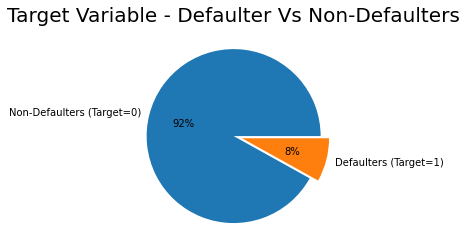

In [43]:
#plotting the same using pie-plot
plt.pie(Application.TARGET.value_counts(normalize=True)*100, labels = ['Non-Defaulters (Target=0)', 'Defaulters (Target=1)'], explode = (0,0.10), autopct='%1.f%%')
plt.title("Target Variable - Defaulter Vs Non-Defaulters", fontdict = {'fontsize':20, 'fontweight':5, 'color':'Black'})
plt.show()

From above output it is clear that there is an imbalance in Target variable; 92% of the clients are not defaulters but 8% are defaulter; which is quiet significant and calls for analysis to understand driving variables behind it. 

**3.6 Shortlisting important columns**

In [44]:
Application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
     

In [45]:
#Shortlisting the important columns based on their description and importance for further analysis.
Final_Columns = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','INCOME_RANGE','Age_Group','SOCIAL_CIRCLE_30_DAYS_DEF_PERC','SOCIAL_CIRCLE_60_DAYS_DEF_PERC','NAME_HOUSING_TYPE','CREDIT_INCOME_RATIO']

In [46]:
Application_Final = Application[Final_Columns]

# 4. Segmenting dataframes for defaulters and non-defaulters

In [47]:
App0 = Application_Final[Application_Final.TARGET == 0] #dataframe for all data related to non-defaulters
App1 = Application_Final[Application_Final.TARGET == 1] #dataframe for all data related to defaulters

**4.1 Univariate Segmented Analysis**

There are many categorical variables by which we can do segmented analysis. So, let's create a function to draw countplot.

In [48]:
#Function of countplot
def plotunisegapp(var):
    
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=App0, ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(App0))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=App1,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(App1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

**4.2 Univariate Ordered Categorical Analysis**

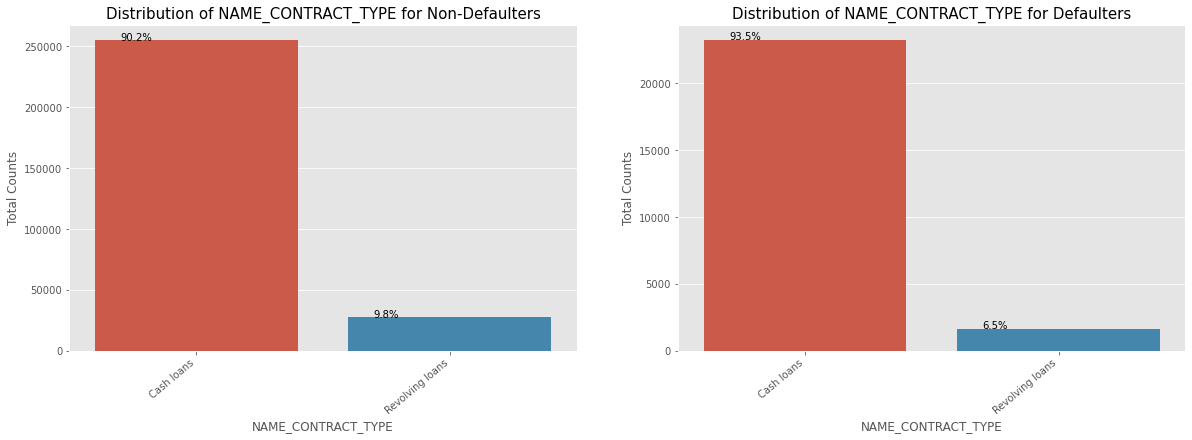

In [49]:
plotunisegapp('NAME_CONTRACT_TYPE')

**Observation** : From above chart, we can see that in both cases applications for Cash loans are higher than revolving loans. **93.5%** of defaulters had applied for cash loans and 6.5% for revolving loans.


**Inference**: Cash loans is very popular loan type for this company yet quiet risky as well.

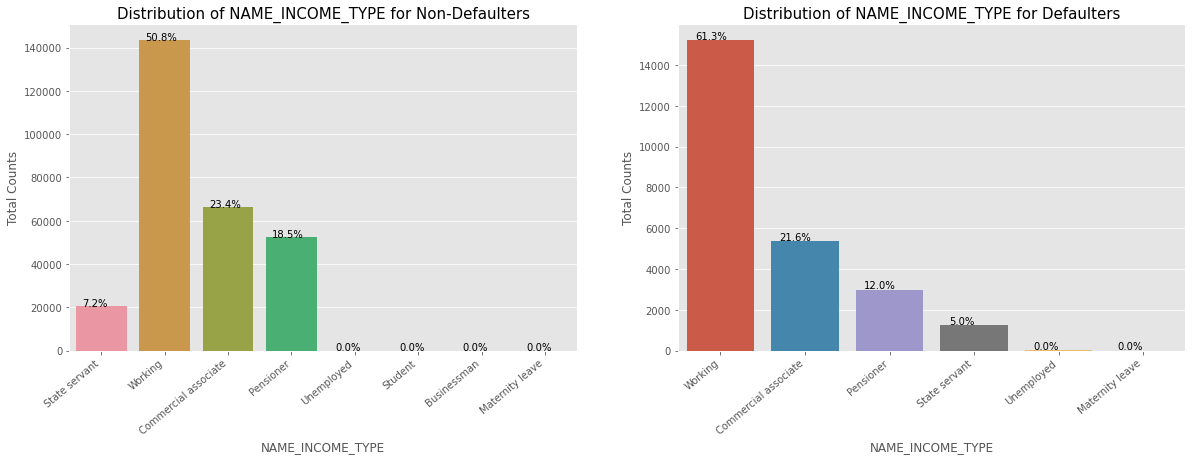

In [50]:
plotunisegapp('NAME_INCOME_TYPE')

**Observation** - In both the cases, most of loans are given to working class clients and they are the highest contributers.
61% of the working class people are defaulters.
Students and businessmen are less likely to default. 

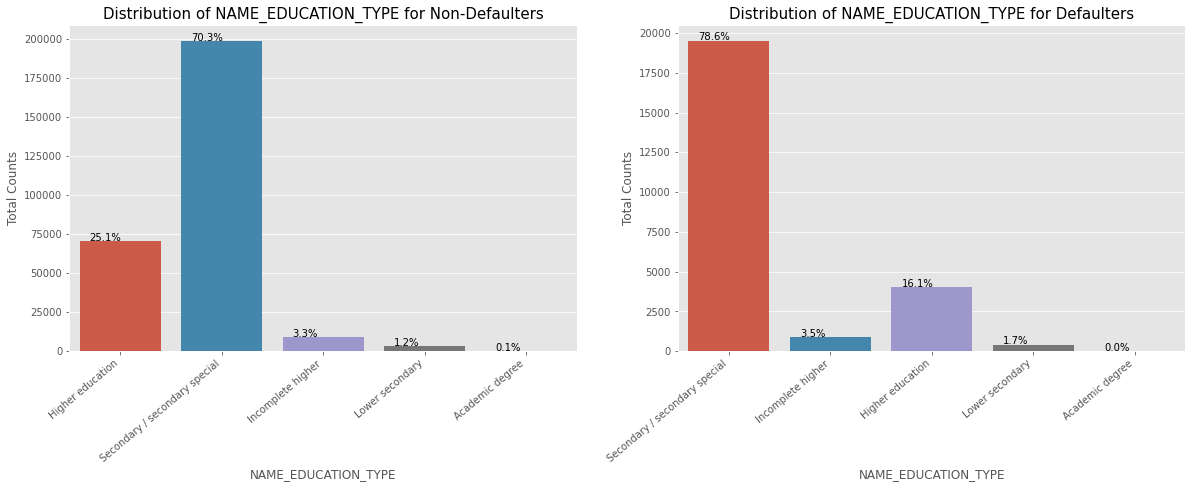

In [51]:
plotunisegapp('NAME_EDUCATION_TYPE')

**Observation** - In both cases, Clients who have secondary/secondary special education are highest contributers. Which shows that, most of the loans are taken by these type of clients; 78% of the defaulters are from secondary education background. 

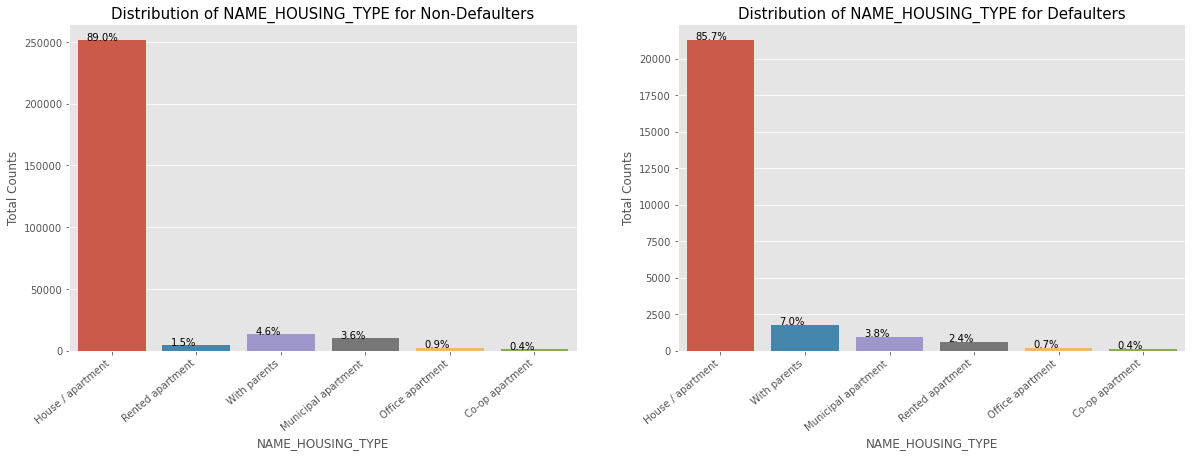

In [52]:
plotunisegapp('NAME_HOUSING_TYPE')

**Observation** - From above chart it is clear that clients staying in or owning house/apartment tend to apply for loans and also 85.7% of the clients staying in house/aparment are defaulters.


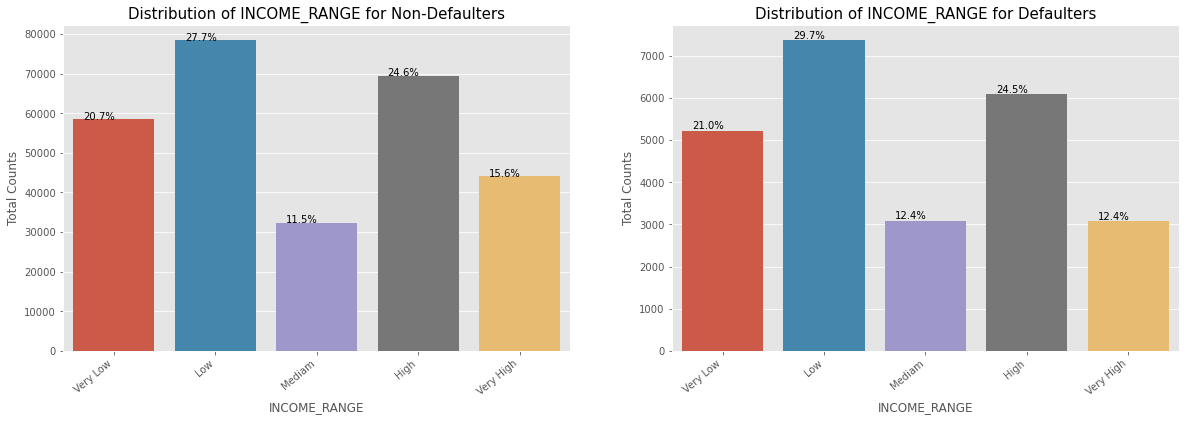

In [53]:
plotunisegapp('INCOME_RANGE')

**Observation** - The Very High income group tend to default less often. They contribute 12.4% to the total number of defaulters, while they contribute 15.6% to the Non-Defaulters.

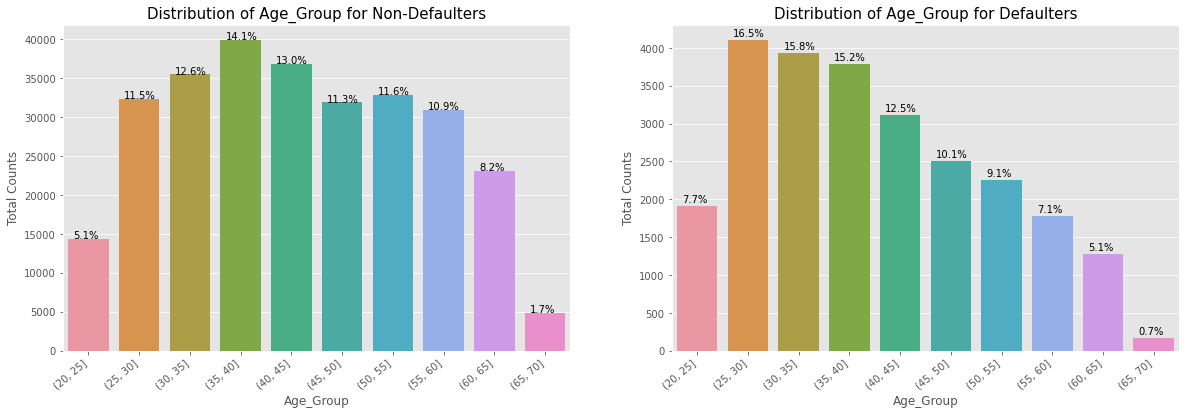

In [54]:
plotunisegapp('Age_Group')

**Observation** - We see that (25,30] age group tend to default more often.
With increasing age group, people tend to default less starting from the age 25. One of the reasons could be they get employed around that age and with increasing age, their salary also increases.

**4.3 Univariate Continuous Variable Analysis**

In [55]:
# function to dist plot for continuous variables
def plotunidist(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a=App0[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
            
    sns.distplot(a=App1[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
        
    plt.show()

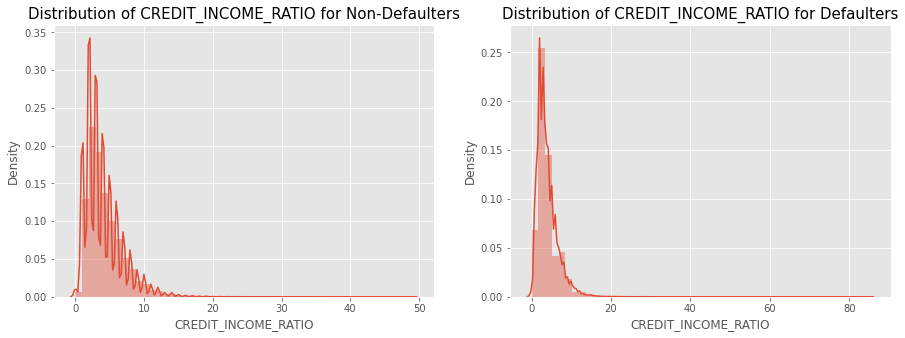

In [56]:
plotunidist('CREDIT_INCOME_RATIO')

Credit income ratio is the ratio of AMT_CREDIT/AMT_INCOME_TOTAL.

Although there doesn't seem to be a clear distinguish between the group which defaulted vs the group which didn't when compared using the ratio. 
We can see that when the CREDIT_INCOME_RATIO is more than 50, people tend to default. 

In [57]:
Application['CNT_FAM_MEMBERS'].value_counts()

2.0     158355
1.0      67847
3.0      52600
4.0      24696
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

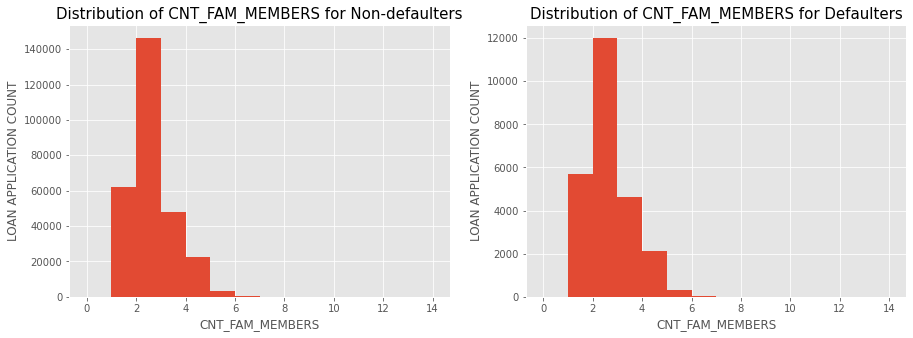

In [58]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
App0['CNT_FAM_MEMBERS'].plot.hist(bins = range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-defaulters', fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1,2,2)
App1['CNT_FAM_MEMBERS'].plot.hist(bins = range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters', fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.show()

We can see that a family of 3 applies loan more often than the other families.

**4.5 Bivariate Analysis of Numerical Variable**

In [59]:
# function for scatter plot for continuous variables
def plotbivar(var1,var2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=App0,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x=var1, y=var2,data=App1,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=15)
            
    plt.show()

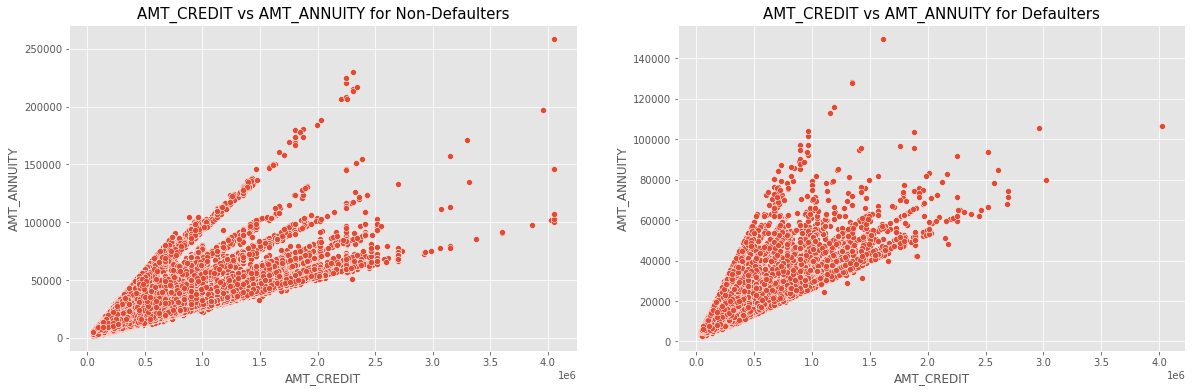

In [60]:
plotbivar('AMT_CREDIT','AMT_ANNUITY')

There is no stark difference between two of the above plotted graphs. 

For same amount of credit the anuuity varies. This must be becuase there can be multiple choices to select anuuity based on monthly income and other related factors. 

The defaulters tend to choose comparatively less amount for annuity than non-defaulters. 

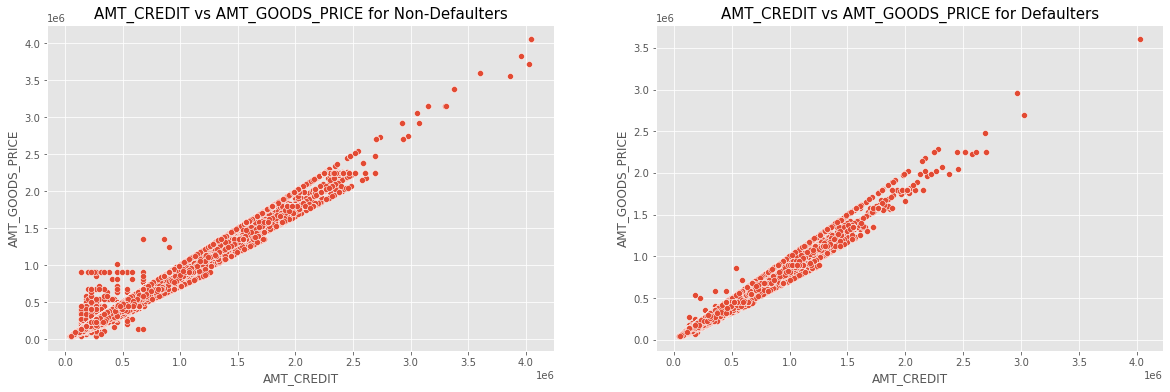

In [61]:
plotbivar('AMT_CREDIT','AMT_GOODS_PRICE')

The above plot doesn't show much difference; amount of credit is directly proportional to amount of goods price. 

# 5. Data Analysis for Previous Application Data

**5.1 Importing files and metadata check**

In [62]:
PreviousApplication = pd.read_csv('previous_application.csv')

In [63]:
#Meta data check
PreviousApplication.shape

(1670214, 37)

In [64]:
PreviousApplication.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
PreviousApplication.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [66]:
round(PreviousApplication.isnull().mean()*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       100.0
RATE_INTEREST_PRIMARY          100.0
RATE_DOWN_PAYMENT               54.0
AMT_DOWN_PAYMENT                54.0
NAME_TYPE_SUITE                 49.0
NFLAG_INSURED_ON_APPROVAL       40.0
DAYS_FIRST_DRAWING              40.0
DAYS_FIRST_DUE                  40.0
DAYS_LAST_DUE_1ST_VERSION       40.0
DAYS_LAST_DUE                   40.0
DAYS_TERMINATION                40.0
AMT_GOODS_PRICE                 23.0
AMT_ANNUITY                     22.0
CNT_PAYMENT                     22.0
SELLERPLACE_AREA                 0.0
NAME_PRODUCT_TYPE                0.0
CHANNEL_TYPE                     0.0
NAME_YIELD_GROUP                 0.0
NAME_SELLER_INDUSTRY             0.0
NAME_GOODS_CATEGORY              0.0
PRODUCT_COMBINATION              0.0
NAME_PORTFOLIO                   0.0
SK_ID_PREV                       0.0
NAME_CLIENT_TYPE                 0.0
CODE_REJECT_REASON               0.0
SK_ID_CURR                       0.0
DAYS_DECISION                    0.0
N

**5.2 Data Cleaning**

In [67]:
# Removing all columns with more than or equal to 50% of null/missing values
PreviousApplication = PreviousApplication.loc[:, PreviousApplication.isnull().mean()<=0.5]
PreviousApplication.shape

(1670214, 33)

In [68]:
PreviousApplication['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

Here we can see that there are 346 XNA values; for which the type of loan is unknown. As Cash and Consumer loans nearly have same count we can't replace XNA with any of the two. We will keep XNA values as it is for further analysis.

**5.3 Univariate Analysis**

In [69]:
# function to count plot for categorical variables across name_contract_status
def plot_uni(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=PreviousApplication,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

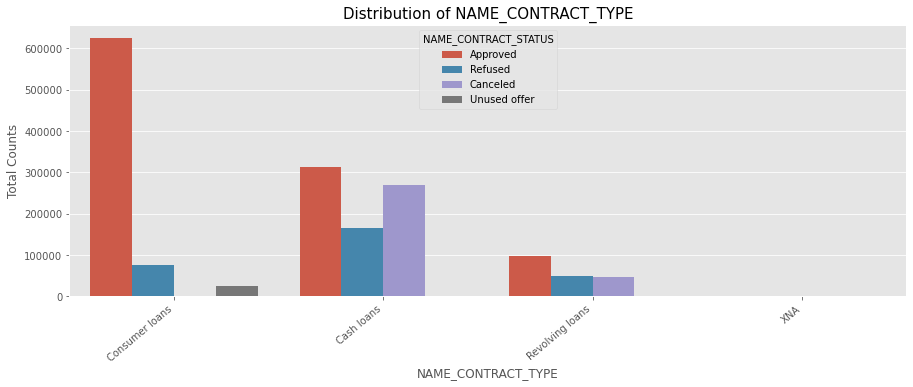

In [70]:
plot_uni('NAME_CONTRACT_TYPE')

From above chart we can infer that, majority of the applications are for Consumer Loans and Cash Loans. However, majority of the applications have been rejected for cash loans among others.

In [71]:
PreviousApplication['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

The value count for XNA is significant here, so the imputation is not possible.

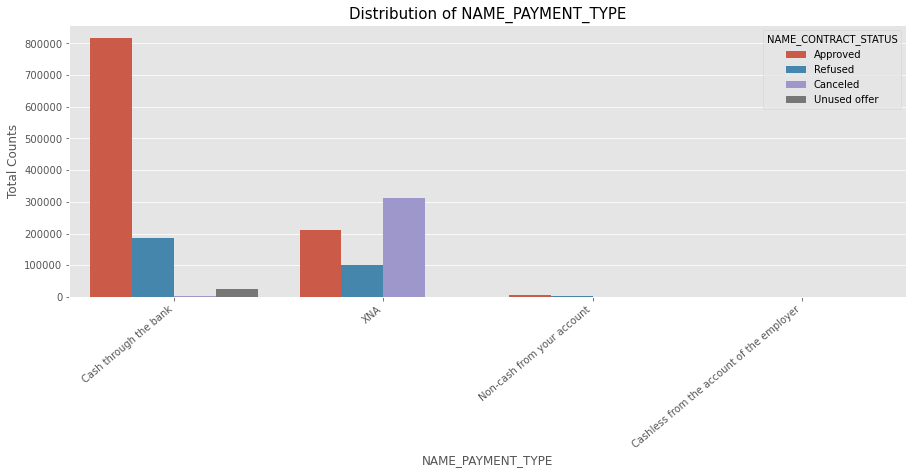

In [72]:
plot_uni('NAME_PAYMENT_TYPE')

From above plot, we can infer that, most of the clients chose to replay via **Cash through the bank**. Non-cash and Cashless from account of client seems unpopular.

In [73]:
PreviousApplication['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [74]:
PreviousApplication['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

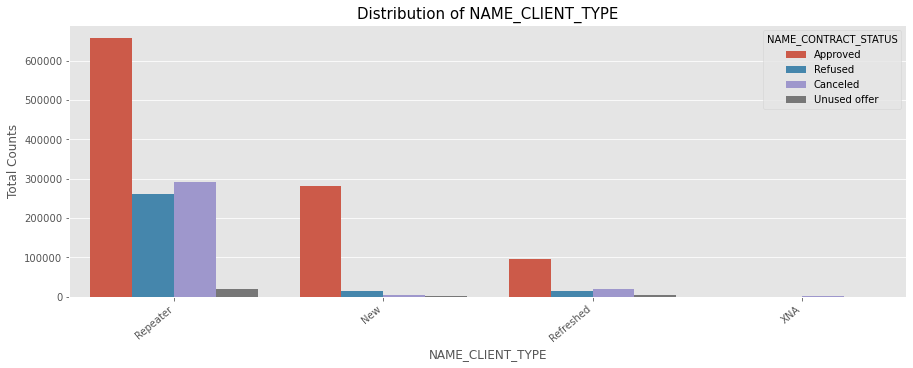

In [75]:
plot_uni('NAME_CLIENT_TYPE')

Most of the loan applications are from repeaters; some of the applications have also been refused. 

**5.4 Checking correlation in previous application data set**

In [76]:
#Getting the top 10 correlation PreviousApplication
corr=PreviousApplication.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
89,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
71,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
70,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
53,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
173,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
174,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


**5.5 Using pair plot to perform bivariate analysis on numerical columns**

<Figure size 1440x576 with 0 Axes>

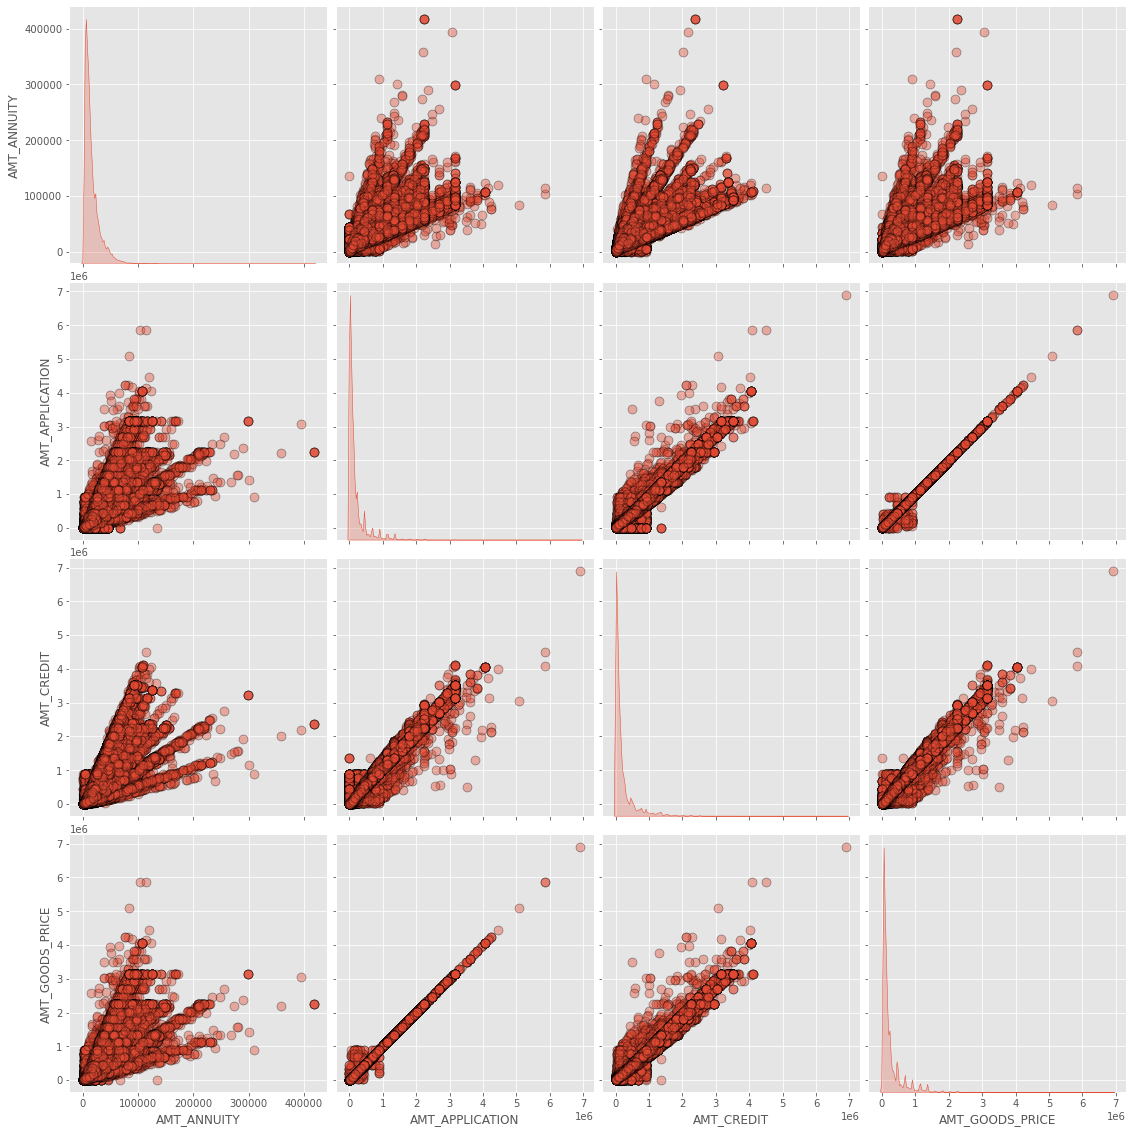

In [77]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(PreviousApplication[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

Annuity of previous application has a very high and positive influence over: (Increase of annuity increases below factors)
(1) The amount of credit did client asked on the previous application
(2)Final credit amount on the previous application that was approved by the bank
(3) Goods price of good that client asked for on the previous application.

For the amount of credit that the client asked on the previous application is highly influenced by the amount of goods price.

Final credit amount disbursed to the customer after approval is same as amount of application and amount of goods price; from this we can infer that when loan was approved the full price of good has been offered by the company.

Amount of Goods price shows similar relation with other three columns, it is almost equal to amount of application and amount that has been credited while taking loan in the client's account. 

Amount of goods price vs amount of annuity is somewhat directly proportional; client might have choice among certain options to decide the annuity according to financial capacity.

**5.6 Using boxplot to do bivariate analysis on Categorical and Numerical Variables**

In [78]:
#by variant analysis function
def plot_by_cat_num(cat, num):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=PreviousApplication)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

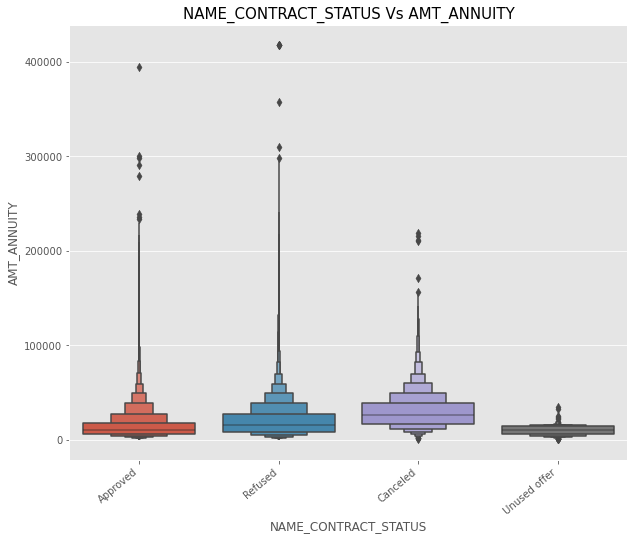

In [79]:
#by-varient analysis of Contract status and Annuity of previous appliction
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

From above plot we can infer that application with lower anuuity fall in category of cancelled or unused offer. On the contrary applications with higher amount of anuuity got refused. 

Approved applications have lesser annuity compared to refused applications.

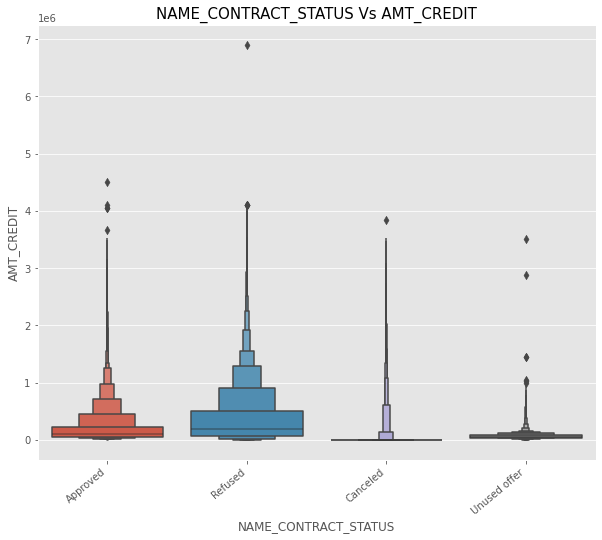

In [80]:
#by-varient analysis of Contract status and Final credit amount disbursed to the customer previously, after approval
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

We can infer that applications with very low credit amount either gets canceled or remain unused by clients.

On the other hand applications with very high credit amount gets refused by company.

# 6. Merging the files and analysing the data

**6.1 Meta Data Check of merged file**

In [81]:
New_app = pd.merge(Application_Final,PreviousApplication, how ='left', on=['SK_ID_CURR'])

In [82]:
New_app.shape

(1430100, 53)

In [83]:
New_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Data columns (total 53 columns):
 #   Column                          Non-Null Count    Dtype   
---  ------                          --------------    -----   
 0   SK_ID_CURR                      1430100 non-null  int64   
 1   TARGET                          1430100 non-null  int64   
 2   NAME_CONTRACT_TYPE_x            1430100 non-null  object  
 3   CODE_GENDER                     1430100 non-null  object  
 4   FLAG_OWN_CAR                    1430100 non-null  object  
 5   FLAG_OWN_REALTY                 1430100 non-null  object  
 6   CNT_CHILDREN                    1430100 non-null  int64   
 7   AMT_CREDIT_x                    1430100 non-null  float64 
 8   AMT_ANNUITY_x                   1430007 non-null  float64 
 9   AMT_GOODS_PRICE_x               1428881 non-null  float64 
 10  NAME_INCOME_TYPE                1430100 non-null  object  
 11  NAME_EDUCATION_TYPE             1430100 non-null  

**6.2 Getting relation between potential driver variables across four contract status**

In [84]:
def plotuni_combined(Varx,Vary):
    # 100% bar chart
    plt.style.use('ggplot')
    sns.despine
    NewDat = New_app.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

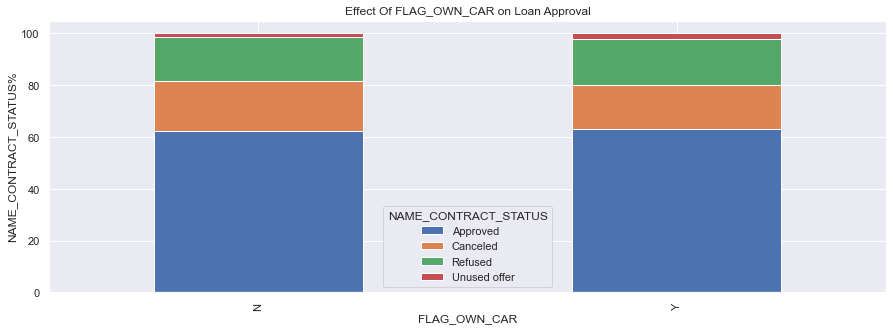

In [85]:
plotuni_combined('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

We see that car ownership doesn't have any effect on application approval or rejection. But we saw earlier that the people who has a car has lesser chances of default. The bank can add more weightage to car ownership while approving a loan amount.

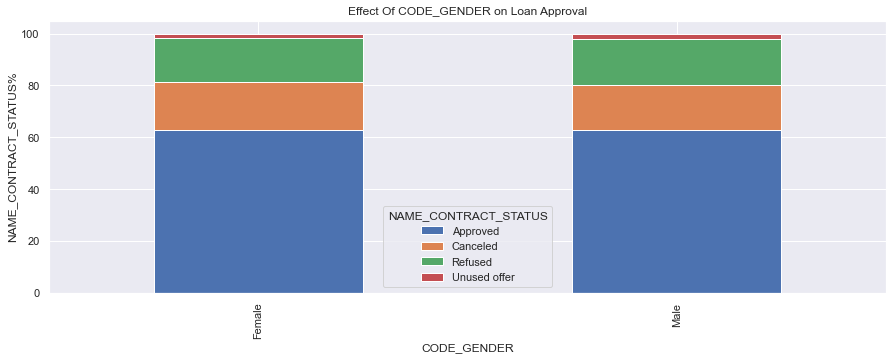

In [86]:
plotuni_combined('CODE_GENDER','NAME_CONTRACT_STATUS')

We see that code gender doesn't have any effect on application approval or rejection.
But we saw earlier that female have lesser chances of default compared to males. The bank can add more weightage to female while approving a loan amount.

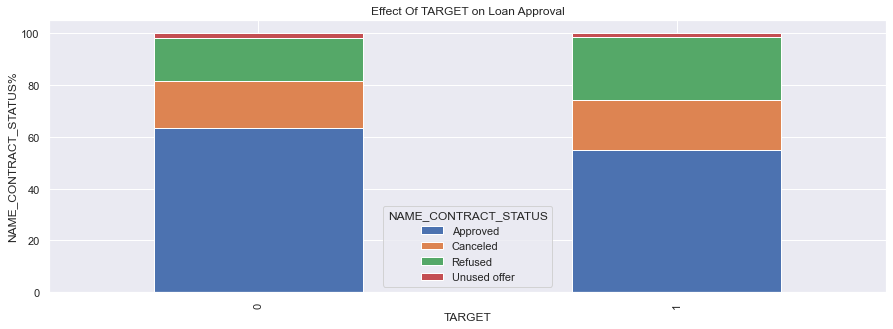

In [87]:
plotuni_combined('TARGET','NAME_CONTRACT_STATUS')

We can see that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting.

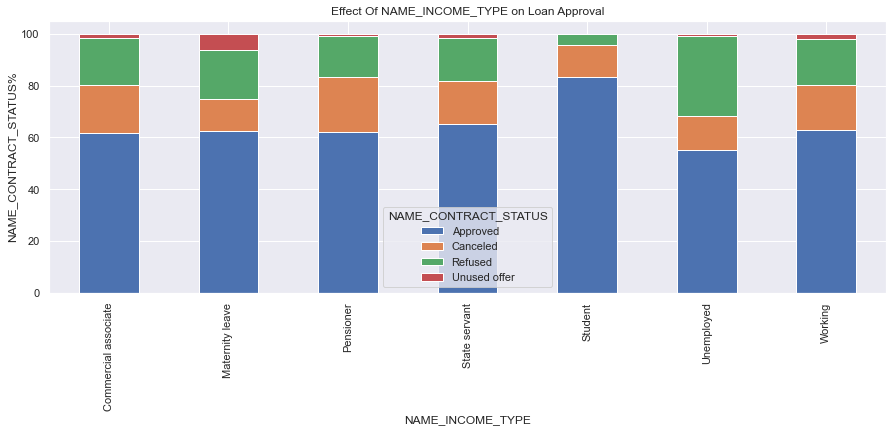

In [88]:
plotuni_combined('NAME_INCOME_TYPE','NAME_CONTRACT_STATUS')

From above plot we can see that majority of the loans are approved for students. Earlier in the analysis we have also noted that students are less likely to default. Hence, bank/company can introduce more lucrative offers for students.

Majority of the loans have been refused for clients who are unemployed; however, the loan has been approved for 50% of the unemployed clients and earlier we have seen that they didn't default. This can be for the purpose of small business. For this class as well by identifying the needs; offers can be made lucrative.

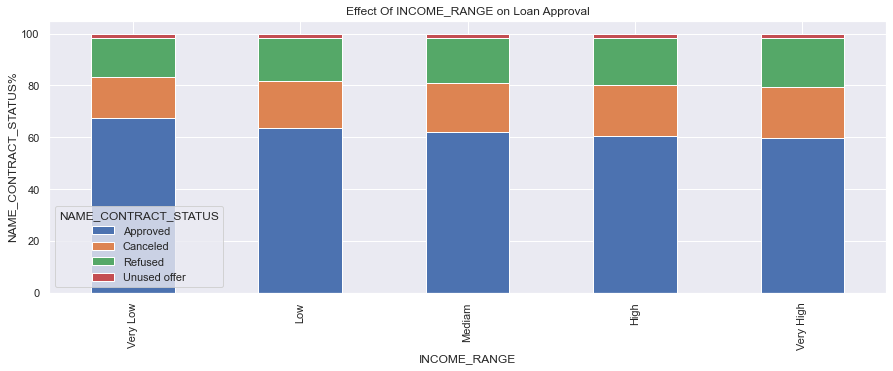

In [89]:
plotuni_combined('INCOME_RANGE','NAME_CONTRACT_STATUS')

This chart doesn't show any stark difference over the income range. Percentages for all contract types are almost same over the income range.